C:\Users\wilso\AppData\Local\Temp\ipykernel_24544\3162360220.py:26: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  trajectory = odeint(system, ic, t)
C:\Users\wilso\AppData\Local\Temp\ipykernel_24544\3162360220.py:37: RuntimeWarning: overflow encountered in scalar power
  norm = np.sqrt(dx**2 + dy**2)
C:\Users\wilso\AppData\Local\Temp\ipykernel_24544\3162360220.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  dx / norm * scale, dy / norm * scale,  # Normalización del tamaño
c:\Users\wilso\anaconda3\envs\clase_mate\Lib\site-packages\matplotlib\patches.py:1543: RuntimeWarning: invalid value encountered in scalar divide
  cx = self._dx / distance
c:\Users\wilso\anaconda3\envs\clase_mate\Lib\site-packages\matplotlib\patches.py:1544: RuntimeWarning: invalid value encountered in scalar divide
  sx = self._dy / distance
C:\Users\wilso\AppData\Local\Temp\ipykernel_24544\3162360220.py:42: Ru

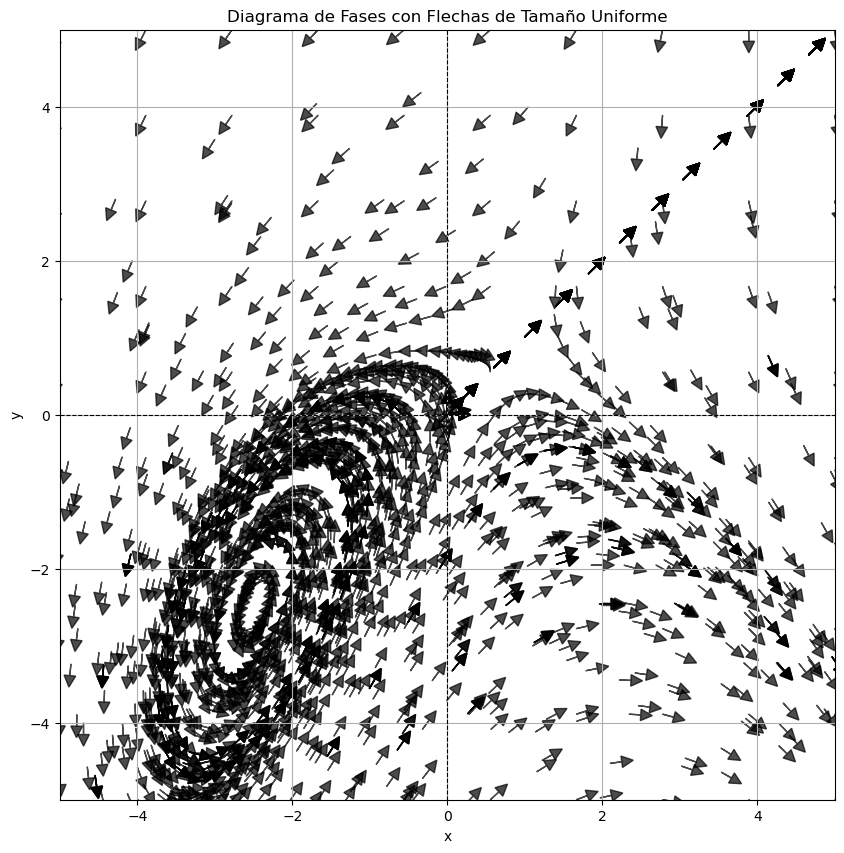

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir el sistema de ecuaciones diferenciales
def system(state, t):
    x, y = state
    dxdt = x - y
    dydt = -0.6*x**2 + 1 - 1.1*y
    return [dxdt, dydt]

# Crear condiciones iniciales distribuidas uniformemente en el plano
x_vals = np.linspace(-5, 5, 10)  # Más puntos iniciales en el eje x
y_vals = np.linspace(-5, 5, 10)  # Más puntos iniciales en el eje y
initial_conditions = [[x, y] for x in x_vals for y in y_vals]  # Crear malla de condiciones iniciales

# Tiempo para resolver las trayectorias
t = np.linspace(0, 10, 1000)  # Más pasos para trayectorias suaves
segment_count = 50  # Número de segmentos por trayectoria

# Graficar el diagrama de fases
plt.figure(figsize=(10, 10))

# Agregar trayectorias como segmentos de flechas
for ic in initial_conditions:
    trajectory = odeint(system, ic, t)
    
    # Dividir la trayectoria en segmentos equidistantes
    indices = np.linspace(0, len(trajectory) - 1, segment_count, dtype=int)
    for i in range(len(indices) - 1):
        x_start, y_start = trajectory[indices[i]]
        x_end, y_end = trajectory[indices[i + 1]]
        
        # Calcular el desplazamiento y normalizar la longitud de las flechas
        dx = x_end - x_start
        dy = y_end - y_start
        norm = np.sqrt(dx**2 + dy**2)
        scale = 0.3  # Escala uniforme para todas las flechas
        
        plt.arrow(
            x_start, y_start,
            dx / norm * scale, dy / norm * scale,  # Normalización del tamaño
            head_width=0.15, head_length=0.15, fc='black', ec='black', alpha=0.7, length_includes_head=True
        )

# Configuración adicional del gráfico
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Eje x
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")  # Eje y
plt.title("Diagrama de Fases con Flechas de Tamaño Uniforme")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.show()


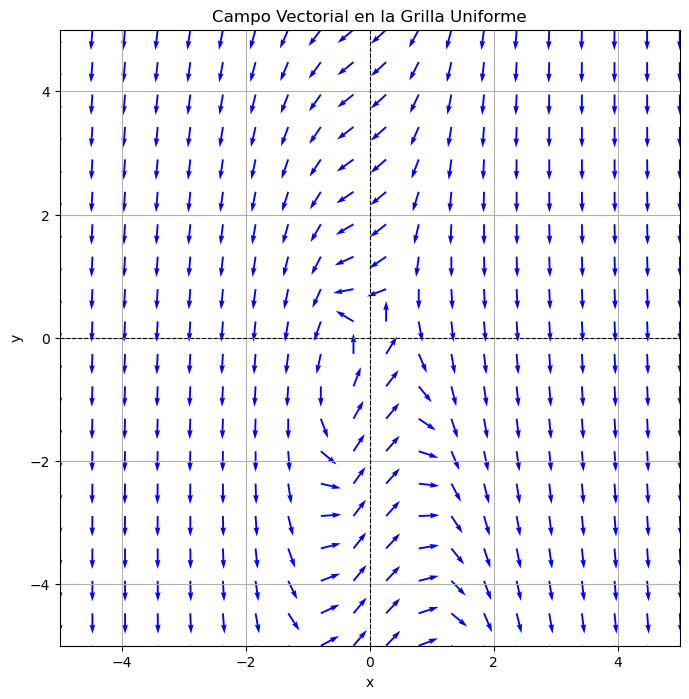

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones diferenciales
def system(x, y):
    dxdt = x - y
    dydt = -6*x**2 + 1 - y
    return dxdt, dydt

# Crear una grilla uniforme
x_vals = np.linspace(-5, 5, 20)  # Más puntos para un gráfico más denso
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular el campo vectorial en cada punto de la grilla
U, V = system(X, Y)

# Normalizar los vectores para que todas las flechas tengan el mismo tamaño
magnitude = 3*np.sqrt(U**2 + V**2)
U /= magnitude
V /= magnitude

# Graficar el campo vectorial
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color="blue", angles="xy", scale_units="xy", scale=1)

# Configuración adicional del gráfico
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Eje x
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")  # Eje y
plt.title("Campo Vectorial en la Grilla Uniforme")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.show()


C:\Users\wilso\AppData\Local\Temp\ipykernel_24180\1733174079.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')
C:\Users\wilso\AppData\Local\Temp\ipykernel_24180\1733174079.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')
C:\Users\wilso\AppData\Local\Temp\ipykernel_24180\1733174079.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


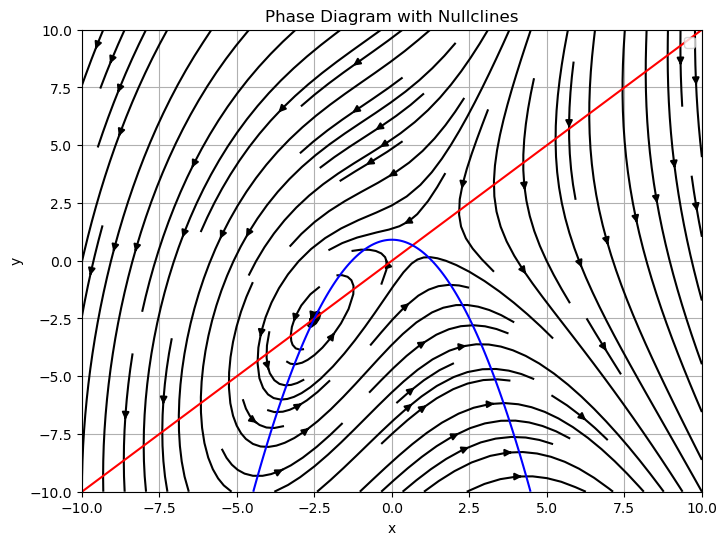

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(x, y):
    dxdt = x - y
    dydt = -0.6*x**2 + 1 - 1.1*y
    return dxdt, dydt

# Create a grid of points
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# Compute the derivatives at each point
DX, DY = system(X, Y)

# Plot the phase diagram
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, DX, DY, color='black')

# Calculate and plot the nullclines
nullcline_x = X - Y
nullcline_y = -0.6*X**2 + 1 - 1.1*Y

plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')
plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Diagram with Nullclines')
plt.grid()
plt.legend()
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the system of differential equations with parameters
def system(x, y, a, b):
    dxdt = a * x - y
    dydt = -0.6 * x**2 + 1 - b * y
    return dxdt, dydt

# Function to plot the phase diagram with nullclines
def plot_phase_diagram(a, b):
    # Create a grid of points
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)

    # Compute the derivatives at each point
    DX, DY = system(X, Y, a, b)

    # Plot the phase diagram
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, DX, DY, color='black')

    # Calculate and plot the nullclines
    nullcline_x = a * X - Y
    nullcline_y = -0.6 * X**2 + 1 - b * Y

    plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')
    plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase Diagram with Nullclines')
    plt.grid()
    plt.legend()
    plt.show()

# Create sliders for the coefficients
a_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='a')
b_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='b')

# Use interact to update the plot with slider values
interact(plot_phase_diagram, a=a_slider, b=b_slider)

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, min=-1.0, step=0.01), FloatSlider(value…

<function __main__.plot_phase_diagram(a, b)>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the system of differential equations with parameters
def system(x, y, a, b, c):
    dxdt = a * x - y
    dydt = c * x**2 + 1 - b * y
    return dxdt, dydt

# Function to plot the phase diagram with nullclines
def plot_phase_diagram(a, b, c):
    # Create a grid of points
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)

    # Compute the derivatives at each point
    DX, DY = system(X, Y, a, b, c)

    # Plot the phase diagram
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, DX, DY, color='black')

    # Calculate and plot the nullclines
    nullcline_x = a * X - Y
    nullcline_y = c * X**2 + 1 - b * Y

    plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')
    plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase Diagram with Nullclines')
    plt.grid()
    plt.legend()
    plt.show()

# Create sliders for the coefficients
a_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='a')
b_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='b')
c_slider = FloatSlider(min=-1, max=1, step=0.01, value=-0.6, description='c')

# Use interact to update the plot with slider values
interact(plot_phase_diagram, a=a_slider, b=b_slider, c=c_slider)

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, min=-1.0, step=0.01), FloatSlider(value…

<function __main__.plot_phase_diagram(a, b, c)>

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the system of differential equations with parameters
def system(x, y, a, b, c, d):
    dxdt = a * x - y
    dydt = c * x**2 + 1 - b * y + d
    return dxdt, dydt

# Function to plot the phase diagram with nullclines
def plot_phase_diagram(a, b, c, d):
    # Create a grid of points
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)

    # Compute the derivatives at each point
    DX, DY = system(X, Y, a, b, c, d)

    # Plot the phase diagram
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, DX, DY, color='black')

    # Calculate and plot the nullclines
    nullcline_x = a * X - Y
    nullcline_y = c * X**2 + 1 - b * Y + d

    plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')
    plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase Diagram with Nullclines')
    plt.grid()
    plt.legend()
    plt.show()

# Create sliders for the coefficients
a_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='a')
b_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='b')
c_slider = FloatSlider(min=-1, max=1, step=0.01, value=-0.6, description='c')
d_slider = FloatSlider(min=-6, max=6, step=0.1, value=0, description='d')

# Use interact to update the plot with slider values
interact(plot_phase_diagram, a=a_slider, b=b_slider, c=c_slider, d=d_slider)

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, min=-1.0, step=0.01), FloatSlider(value…

<function __main__.plot_phase_diagram(a, b, c, d)>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the system of differential equations with parameters
def system(x, y, a, b, c, d):
    dxdt = a * x**3 - b * x - y
    dydt = c * x**2 + 1 - d * y
    return dxdt, dydt

# Function to plot the phase diagram with nullclines
def plot_phase_diagram(a, b, c, d):
    # Create a grid of points
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)

    # Compute the derivatives at each point
    DX, DY = system(X, Y, a, b, c, d)

    # Plot the phase diagram
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, DX, DY, color='black')

    # Calculate and plot the nullclines
    nullcline_x = a * X**3 - b * X - Y
    nullcline_y = c * X**2 + 1 - d * Y

    plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')
    plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase Diagram with Nullclines')
    plt.grid()
    plt.legend()
    plt.show()

# Create sliders for the coefficients
a_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='a')
b_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='b')
c_slider = FloatSlider(min=-1, max=1, step=0.01, value=-0.6, description='c')
d_slider = FloatSlider(min=-1, max=1, step=0.01, value=1, description='d')

# Use interact to update the plot with slider values
interact(plot_phase_diagram, a=a_slider, b=b_slider, c=c_slider, d=d_slider)

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, min=-1.0, step=0.01), FloatSlider(value…

<function __main__.plot_phase_diagram(a, b, c, d)>